## Step 0: Jupyter Notebook Setup and Additional Data Cleanup/Setting

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
import random

In [26]:
# plots linear regression line and returns pearson correlation
def plot_linregress(x_values, y_values, x_label, y_label, scatter_color):
    plt.scatter(x_values, y_values, color=scatter_color)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    plt.plot(x_values,regress_values,"r-", alpha=0.7)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq, (min(x_values), min(y_values)),fontsize=18,color="red", alpha=0.7)
    return abs(st.pearsonr(x_values, y_values)[0])

# adds dashed lines to show significane of each GAD threshold
def gad_annotations(x_values):
    # no anxiety
    plt.axhline(4, color='black', alpha = 0.5, linestyle='dashed')
    plt.annotate('No anxiety', (max(x_values)*.85, 3.3), fontsize = 10, color='black', alpha=0.7)
    # mild anxiety
    plt.axhline(9, color='black', alpha = 0.5, linestyle='dashed')
    plt.annotate('Mild anxiety', (max(x_values)*.85, 8.3), fontsize = 10, color='black', alpha=0.7)
    # moderate anxiety
    plt.axhline(14, color='black', alpha = 0.5, linestyle='dashed')
    plt.annotate('Moderate anxiety', (max(x_values)*.85, 13.3), fontsize = 10, color='black', alpha=0.7)
    # severe anxiety
    plt.axhline(21, color='black', alpha = 0.5, linestyle='dashed')
    plt.annotate('Severe anxiety', (max(x_values)*.85, 20.3), fontsize = 10, color='black', alpha=0.7)

# adds dashed lines to show significane of each SWL threshold
def swl_annotations(x_values):
    # extremely dissatisfied
    plt.axhline(9, color='black', alpha = 0.5, linestyle='dashed')
    plt.annotate('Extremely dissatisfied', (max(x_values)*.8, 7.9), fontsize = 10, color='black', alpha=0.7)
    # dissatisfied
    plt.axhline(14, color='black', alpha = 0.5, linestyle='dashed')
    plt.annotate('Dissatisfied', (max(x_values)*.8, 12.9), fontsize = 10, color='black', alpha=0.7)
    # slightly dissatisfied
    plt.axhline(19, color='black', alpha = 0.5, linestyle='dashed')
    plt.annotate('Slightly dissatisfied', (max(x_values)*.8, 17.9), fontsize = 10, color='black', alpha=0.7)
    # neutral
    plt.axhline(20, color='black', alpha = 0.5, linestyle='dashed')
    plt.annotate('Neutral', (max(x_values)*.8, 20.5), fontsize = 10, color='black', alpha=0.7)
    # Slightly satisfied
    plt.axhline(25, color='black', alpha = 0.5, linestyle='dashed')
    plt.annotate('Slightly satisfied', (max(x_values)*.8, 23.9), fontsize = 10, color='black', alpha=0.7)
    # Satisfied
    plt.axhline(30, color='black', alpha = 0.5, linestyle='dashed')
    plt.annotate('Satisfied', (max(x_values)*.8, 28.9), fontsize = 10, color='black', alpha=0.7)
    # Extremely satisfied
    plt.axhline(35, color='black', alpha = 0.5, linestyle='dashed')
    plt.annotate('Extremely satisfied', (max(x_values)*.8, 33.9), fontsize = 10, color='black', alpha=0.7)

# adds dashed lines to show significane of each SPIN threshold
def spin_annotations(x_values):
    # no social anxiety
    plt.axhline(20, color='black', alpha = 0.5, linestyle='dashed')
    plt.annotate('No social anxiety', (max(x_values)*.82, 17.5), fontsize = 10, color='black', alpha=0.7)
    # mild anxiety
    plt.axhline(30, color='black', alpha = 0.5, linestyle='dashed')
    plt.annotate('Mild anxiety', (max(x_values)*.82, 27.5), fontsize = 10, color='black', alpha=0.7)
    # moderate anxiety
    plt.axhline(40, color='black', alpha = 0.5, linestyle='dashed')
    plt.annotate('Moderate anxiety', (max(x_values)*.82, 37.5), fontsize = 10, color='black', alpha=0.7)
    # severe anxiety
    plt.axhline(50, color='black', alpha = 0.5, linestyle='dashed')
    plt.annotate('Severe anxiety', (max(x_values)*.82, 47.5), fontsize = 10, color='black', alpha=0.7)
    # very severe anxiety
    plt.axhline(68, color='black', alpha = 0.5, linestyle='dashed')
    plt.annotate('Very severe anxiety', (max(x_values)*.82, 65.5), fontsize = 10, color='black', alpha=0.7)


In [27]:
# import data
gaming_data = pd.read_csv('data_cleanup/Gaming.csv', encoding='UTF-8')


In [28]:
# trim data
gaming_data = gaming_data[['Entry', 'Gender', 'Age', 'Game', 'Hours per Week', 
            'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7', 'GAD Total', 
            'SWL1', 'SWL2', 'SWL3', 'SWL4', 'SWL5', 'SWL Total',
            'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6', 'SPIN7', 'SPIN8',
            'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12', 'SPIN13', 'SPIN14', 'SPIN15',
            'SPIN16', 'SPIN17', 'SPIN Total']]

gaming_data.head()

,Entry,Gender,Age,Game,Hours per Week,GAD1,GAD2,GAD3,GAD4,GAD5,...,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,SPIN Total
0,1,Male,25,Skyrim,15,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,5
1,2,Male,41,Other,8,1,2,2,2,0,...,4,0,3,0,1,3,3,1,2,33
2,3,Female,32,Other,0,0,2,2,0,0,...,0,1,1,3,0,2,4,4,2,31
3,4,Male,28,Other,20,0,0,0,0,0,...,0,0,1,3,0,0,1,0,0,11
4,5,Male,19,Other,20,2,1,2,2,2,...,2,0,1,0,0,0,0,3,0,13


In [30]:
# Create age bins
bins = [18, 21, 25, 30, 60]

# Create labels for said bins
group_labels = ["18 to 21", "22 to 25", "26 to 30", "31 to 60"]

# Bin the data
gaming_data["Age Group"] = pd.cut(gaming_data["Age"], bins, labels=group_labels)


In [31]:
# Reorganize DataFrame
gaming_data = gaming_data[['Entry', 'Gender', 'Age Group', 'Age', 'Game', 'Hours per Week', 
            'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7', 'GAD Total', 
            'SWL1', 'SWL2', 'SWL3', 'SWL4', 'SWL5', 'SWL Total',
            'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6', 'SPIN7', 'SPIN8',
            'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12', 'SPIN13', 'SPIN14', 'SPIN15',
            'SPIN16', 'SPIN17', 'SPIN Total']]
gaming_data

,Entry,Gender,Age Group,Age,Game,Category,Hours per Week,GAD1,GAD2,GAD3,...,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,SPIN Total
0,1,Male,22 to 25,25,Skyrim,RPG,15,0,0,0,...,0,0,0,0,0,1,0,1,0,5
1,2,Male,31 to 60,41,Other,N/A,8,1,2,2,...,4,0,3,0,1,3,3,1,2,33
2,3,Female,31 to 60,32,Other,N/A,0,0,2,2,...,0,1,1,3,0,2,4,4,2,31
3,4,Male,26 to 30,28,Other,N/A,20,0,0,0,...,0,0,1,3,0,0,1,0,0,11
4,5,Male,18 to 21,19,Other,N/A,20,2,1,2,...,2,0,1,0,0,0,0,3,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11133,14246,Male,22 to 25,22,Other,N/A,40,1,0,0,...,0,0,0,0,0,0,1,0,0,7
11134,14247,Female,18 to 21,20,League of Legends,MOBA,20,3,3,3,...,2,1,4,0,2,2,1,0,1,25
11135,14248,Male,18 to 21,19,Starcraft 2,RTS,20,0,0,0,...,0,1,1,1,0,1,0,0,0,10
11136,14249,Female,NaN,18,Other,N/A,5,3,2,1,...,4,1,3,1,0,3,2,0,1,32


Terminology:
- GAD-7 is the Generalized Anxiety Disorder survey used as an initial screening tool for generalized anxiety disorder. Each item is statement where scored from 0-3. with 0 being little to no anxiety, 3 being the most anxious.
    - Anxiety severity scale: (https://patient.info/doctor/generalised-anxiety-disorder-assessment-gad-7)
        - 0-4: No anxiety
        - 5-9: Mild anxiety
        - 10-14: Moderate anxiety
        - 15-21: Severe anxiety
- SWL is the Satisfaction with Life Scale. Each item is statement scored from 1-7. 1 being unsatisfied, 7 being ideal.
    - SWL Scale: https://positivepsychology.com/life-satisfaction-scales/
        - 31–35 = Extremely satisfied
        - 26–30 = Satisfied
        - 21–25 = Slightly satisfied
        - 20 = Neutral
        - 15–19 = Slightly dissatisfied
        - 10–14 = Dissatisfied
        - 5–9 = Extremely dissatisfied
- SPIN is the Social Phobia Inventory. Each item is a statement scored from 0-4. 0 being unbothered, 4 being most bothered.
    - SPIN Scale: (https://www.verywellhealth.com/social-phobia-inventory-test-5271967)
        - No social anxiety (0-20)
        - Mild (21-30)
        - Moderate (31-40)
        - Severe (41-50)
        - Very severe (51-68)

### Question 1: Do League players suffer more proportionately from GAD/Social Phobia than people playing other games? How about life satisfaction?
- Hypotheses: League players more likely than other players to have:
    - GAD scores between 10-21
    - SWL scores between 5-20
    - SPIN scores between 41-68

In [88]:
# split data into League gamers v. Non-League gamers
league_data = gaming_data[gaming_data['Game'] == 'League of Legends']
not_league_data = gaming_data[gaming_data['Game'] != 'League of Legends']

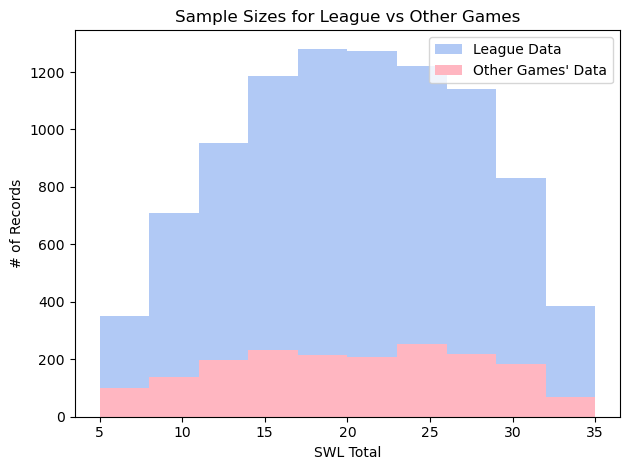

In [34]:
# visual comparison of SWL data between league and non-league gamers
plt.hist(league_data['SWL Total'], alpha=0.5, label='League Data', color='cornflowerblue')
plt.hist(not_league_data['SWL Total'], label="Other Games' Data", color='lightpink')
plt.xlabel('SWL Total')
plt.ylabel('# of Records')
plt.legend(loc='best')
plt.title('Sample Sizes for League vs Other Games')
plt.tight_layout()

plt.savefig('images/SWL_SampleSizes_for_League_v_Other')

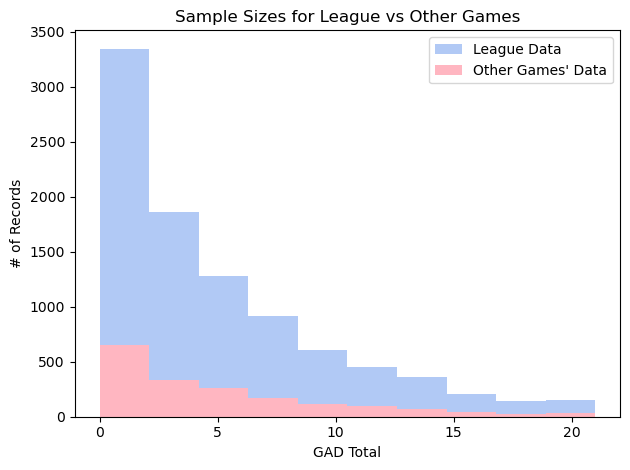

In [35]:
# visual comparison of GAD data between league and non-league gamers
plt.hist(league_data['GAD Total'], alpha=0.5, label='League Data', color='cornflowerblue')
plt.hist(not_league_data['GAD Total'], label="Other Games' Data", color='lightpink')
plt.xlabel('GAD Total')
plt.ylabel('# of Records')
plt.legend(loc='best')
plt.title('Sample Sizes for League vs Other Games')
plt.tight_layout()

plt.savefig('images/GAD_SampleSizes_for_League_v_Other')

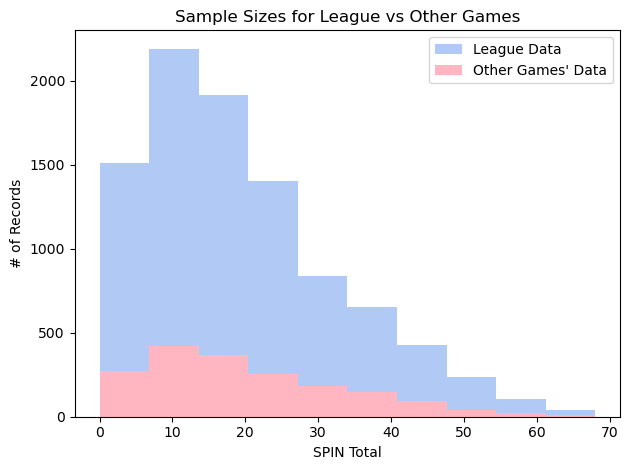

In [36]:
# visual comparison of SPIN data between league and non-league gamers
plt.hist(league_data['SPIN Total'], alpha=0.5, label='League Data', color='cornflowerblue')
plt.hist(not_league_data['SPIN Total'], label="Other Games' Data", color='lightpink')
plt.xlabel('SPIN Total')
plt.ylabel('# of Records')
plt.legend(loc='best')
plt.title('Sample Sizes for League vs Other Games')
plt.tight_layout()

plt.savefig('images/SPIN_SampleSizes_for_League_v_Other')

In [37]:
# calculate T-Test of league player scores v not_league player scores
swl_lol_ttest = st.ttest_ind(league_data['SWL Total'], not_league_data['SWL Total'])
gad_lol_ttest = st.ttest_ind(league_data['GAD Total'], not_league_data['GAD Total'])
spin_lol_ttest = st.ttest_ind(league_data['SPIN Total'], not_league_data['SPIN Total'])
print('The statistical significance values (p-values) between League and Non-League Players are:')
print(f'\tSWL p-value: {round(swl_lol_ttest.pvalue, 2)}')
print(f'\tGAD p-value: {round(gad_lol_ttest.pvalue, 2)}')
print(f'\tSPIN p-value: {round(spin_lol_ttest.pvalue, 2)}')
print('Because the p-values for each of the tests are greater than 0.5, \nwe cannot reject the null hypothesis that there is no difference between these two populations.')

The statistical significance values (p-values) between League and Non-League Players are:
	SWL p-value: 0.28
	GAD p-value: 0.48
	SPIN p-value: 0.09
Because the p-values for each of the tests are greater than 0.5, 
we cannot reject the null hypothesis that there is no difference between these two populations.


## Question 2: Is there any correlation between ages of gamers and their psychological scores? Do older players tend to have lower Generalized Anxiety or Social Phobia? Are older players more satisfied with life?

In [38]:
# create x_age sample for plotting the various tests
sample_size = 100
sample_age = gaming_data.sample(sample_size)
x_age = sample_age['Age'].sample(sample_size)

Pearson correlation coefficient is 0.05


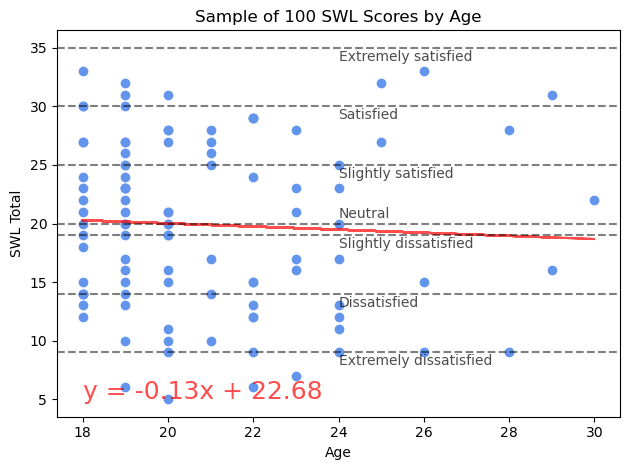

In [39]:
# plot sample of 
# SWL Totals v Age
swl_y_age = sample_age['SWL Total']
pears = plot_linregress(x_age, swl_y_age, 'Age', 'SWL Total', 'cornflowerblue')
swl_annotations(x_age)
plt.title(f'Sample of {sample_size} SWL Scores by Age')
plt.tight_layout()
print(f'Pearson correlation coefficient is {abs(round(pears,2))}')

plt.savefig('images/Sample_SWL_by_Age')

Pearson correlation coefficient is 0.07


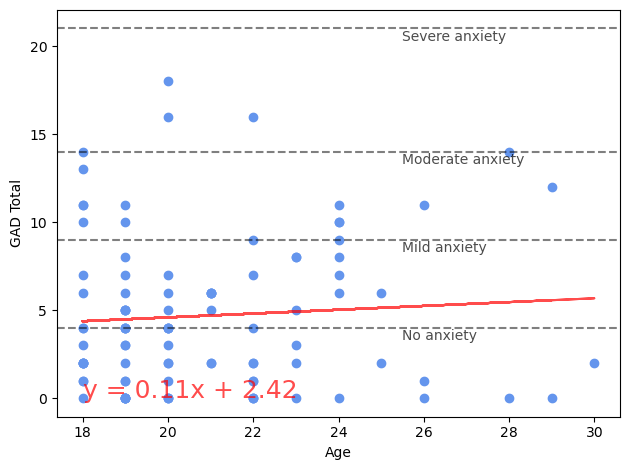

In [40]:
# GAD Totals v Age
gad_y_age = sample_age['GAD Total']
pears = plot_linregress(x_age, gad_y_age, 'Age', 'GAD Total', 'cornflowerblue')
gad_annotations(x_age)
plt.tight_layout()
print(f'Pearson correlation coefficient is {abs(round(pears,2))}')

plt.savefig('images/Sample_GAD_by_Age')

Pearson correlation coefficient is 0.07


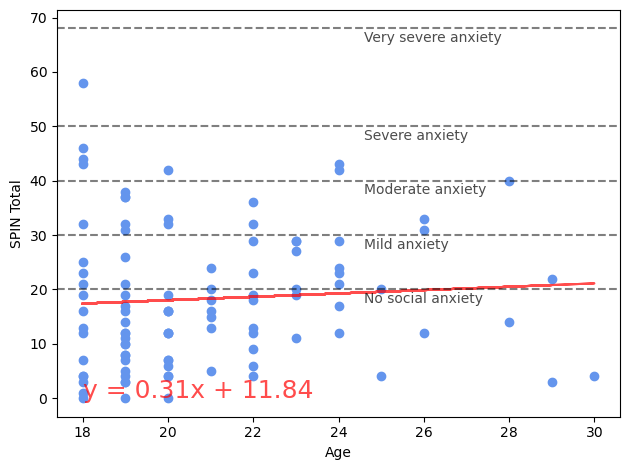

In [41]:
# SPIN Totals v Age
spin_y_age = sample_age['SPIN Total']
pears = plot_linregress(x_age, spin_y_age, 'Age', 'SPIN Total', 'cornflowerblue')
spin_annotations(x_age)
plt.tight_layout()
print(f'Pearson correlation coefficient is {abs(round(pears,2))}')

plt.savefig('images/Sample_SPIN_by_Age')

Based on the pearson correlation coefficients above for SWL, GAD, and SPIN scores, there is no correlation between age and the aforementioned psychological tests.

In [89]:
# create aggregate table of ages v test scores
age_summary = gaming_data.groupby('Age')[['SWL Total', 'GAD Total', 'SPIN Total']]
agg_age = age_summary.agg(['mean', 'median', 'var', 'std', 'sem'])

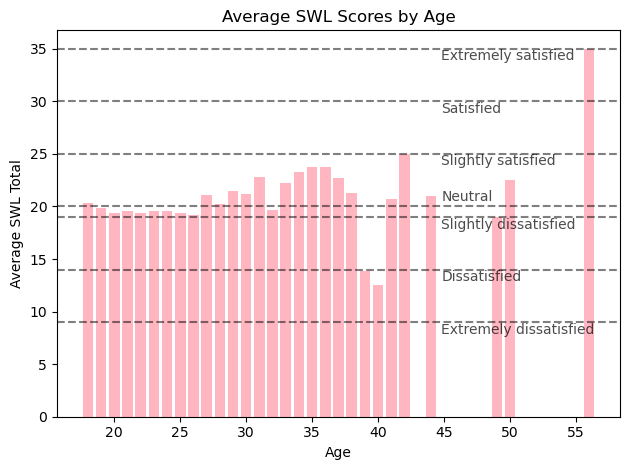

In [43]:
# plot SWL scores by age
x_values = agg_age.index
y_values = agg_age['SWL Total']['mean']
plt.bar(x_values, y_values, color='lightpink')
swl_annotations(x_values)
plt.xlabel('Age')
plt.ylabel('Average SWL Total')
plt.title('Average SWL Scores by Age')
plt.tight_layout()

plt.savefig('images/Average_SWL_by_Age')

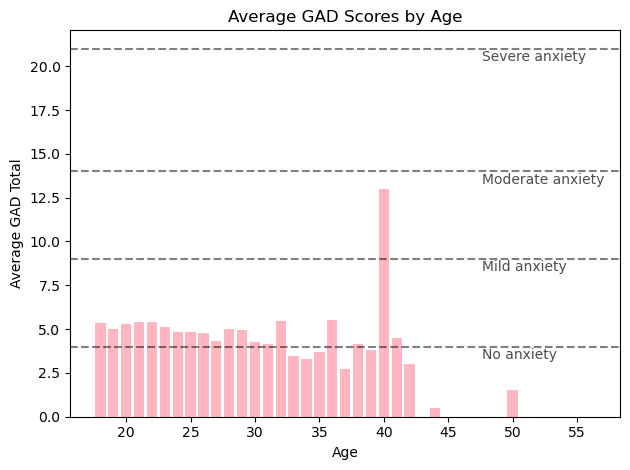

In [48]:
# plot GAD scores by age
x_values = agg_age.index
y_values = agg_age['GAD Total']['mean']
plt.bar(agg_age.index, agg_age['GAD Total']['mean'], color='lightpink')
gad_annotations(x_values)
plt.xlabel('Age')
plt.ylabel('Average GAD Total')
plt.title('Average GAD Scores by Age')
plt.tight_layout()

plt.savefig('images/Average_GAD_by_Age')

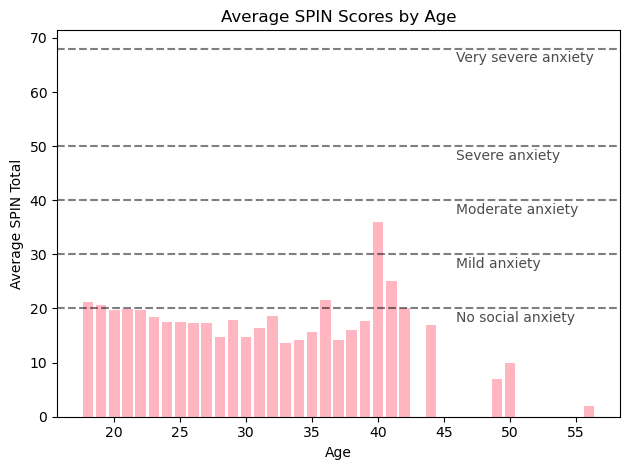

In [49]:
# plot SPIN scores by age
x_values = agg_age.index
y_values = agg_age['SPIN Total']['mean']
plt.bar(agg_age.index, agg_age['SPIN Total']['mean'], color='lightpink')
spin_annotations(x_values)
plt.xlabel('Age')
plt.ylabel('Average SPIN Total')
plt.title('Average SPIN Scores by Age')
plt.tight_layout()

plt.savefig('images/Average_SPIN_by_Age')

In addition the pearson correlation coefficient analysis, plotting the average test scores for SWL, GAD, and SPIN, it is clear that there is no correlation between age and these psychological tests.

### Auxiliary Graphs/Exploration

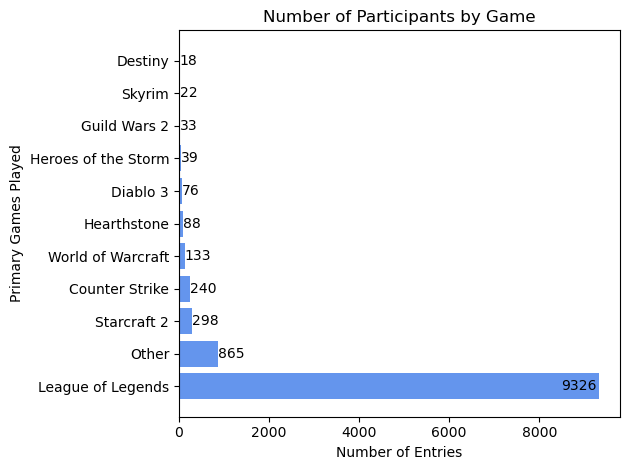

In [87]:
# show game data skew
games_only = gaming_data['Game'].value_counts()
# plot games data to visualize. chose 
fig1, ax1 = plt.subplots()
bars = ax1.barh(games_only.index, games_only, color='cornflowerblue')
# make complementary lists for plotting. League will overlap along the edge of the graph if not.
other_games = [game if game != games_only.iloc[0] else '' for game in games_only]
league_bar = [game if game == games_only.iloc[0] else ''for game in games_only]
# plot said complementary lists
ax1.bar_label(bars, other_games)
ax1.bar_label(bars, league_bar, padding = -27)
plt.xlabel('Number of Entries')
plt.ylabel('Primary Games Played')
plt.title('Number of Participants by Game')
plt.tight_layout()

plt.savefig('images/Total_Participants_By_Game')

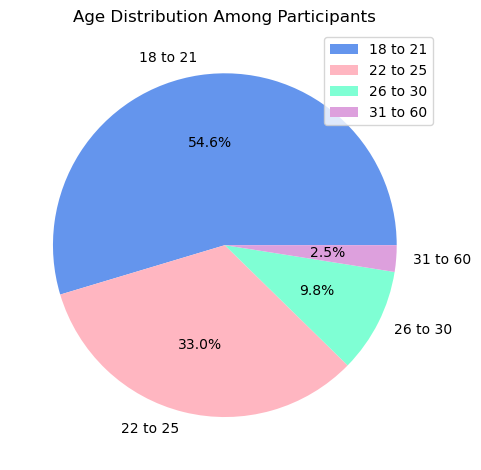

In [86]:
# show age data skew
age_only = gaming_data['Age Group'].value_counts()
# pie chart
plt.pie(age_only, labels=age_only.index, autopct='%.1f%%', colors=['cornflowerblue','lightpink','aquamarine','plum'])
plt.legend(loc='best')
plt.title('Age Distribution Among Participants')
plt.tight_layout()

plt.savefig('images/Age_Distribution_Among_Participants')